Magnetic resolution/cadence:  0.04461 Magnetic sampling frequency, Hz:  22.416498542927595 Hz


<IPython.core.display.Javascript object>


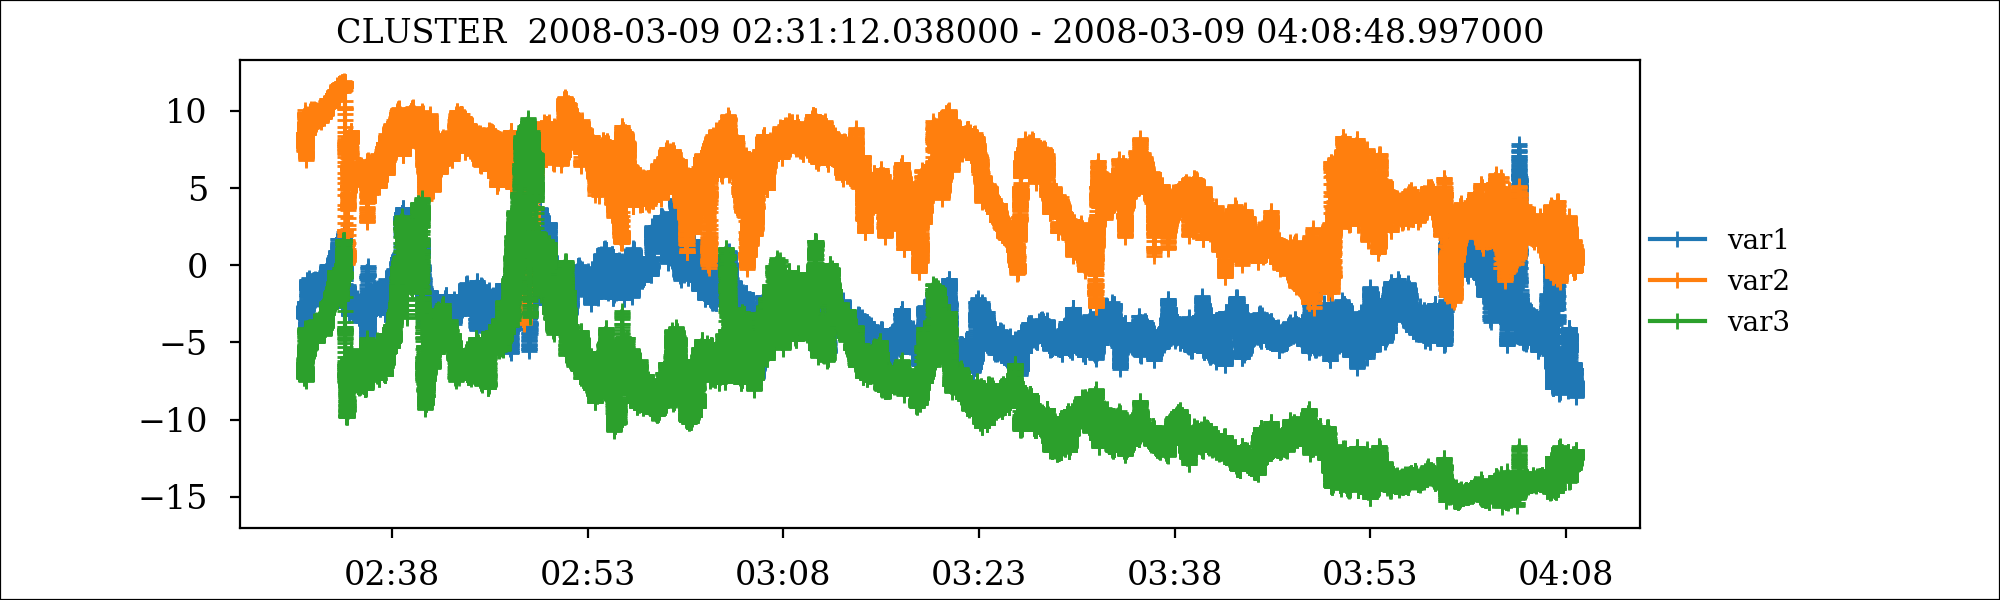

In [1]:
import sys, os, urllib
%matplotlib notebook
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import datetime
from math import *
sys.path.append('../AnalysisMethods/')
import ANALYSIS as AN
import draw_attr as D
os.getcwd()

###################################################################################################################
'''DEFAULTS AND DATA FILES INPUTS'''
###################################################################################################################
'''!!! REMOVE '#' AND CHOOSE PYTHON VERSION YOU HAVE INSTALLED ON YOUR COMPUTER !!!'''
#pyv='Python3' # choose either 'Python2' or 'Python3' 


## defaults for all satellite data
default_config_path='../Config/'
default_input_path = '../Data/'
default_output_path='../Results/'


###################################################################################################################
'''RETRIEVE CONFIGURATION VARIABLES FROM CONFIG FILE'''
###################################################################################################################
with open(default_config_path+'CONFIG_FILE.txt') as f:
    for l in f:
        exec(l)
###################################################################################################################


###################################################################################################################
'''RETRIEVE DATA TO BE ANALYZED'''
###################################################################################################################

'''!!! REMOVE '#' AND CHOOSE SATELLITE, PROBE and DATA RESOLUTION IN SECONDS  !!!'''
satellite='CLUSTER'#'ULYSSES','CLUSTER','VEX', 'USER_DEFINED'
probe='C3'#'C1','C2','C3','C4'
data_res=1. # default value of 1 s between measurements

if satellite=='CLUSTER':
    file_name=probe+'_CP_FGM_FULL__20080309_023112_20080309_040849_V080906.cdf'
elif satellite=='VEX':
    file_name='VEX_MAG_2007-02-06_133920-185444.txt'
    #file_name='MAG_20070206_DOY037_D001_V1.TAB'
    year='2007'
elif satellite=='ULYSSES':
    file_name='U01001SH.ASC'
    #file_name='U99081SH.ASC'    
elif satellite=='USER_DATA':
    file_name='USER_DATA_SAMPLE.txt'
else:
    print ('THE SATELLITE IS NOT SUPPORTED')    
###################################################################################################################


###################################################################################################################
'''GLOBAL VARIABLES'''
###################################################################################################################
flag=9999. # flag value for missing measurements
binno=100 # number of bins for PDF and Structure Functions methods
choose_var_start=0 # choose first column of data to be analyzed, counting starts from 0
choose_var_stop=3 # choose last column of data to be analyzed, last column in the file 
###################################################################################################################


###################################################################################################################
'''RETRIEVE DATA FROM INPUT FILES'''
###################################################################################################################
if satellite=='CLUSTER':
    ALL_MAG_DATA, MAG_TIME, data_res=AN.CLUSTER_DATA_CDF(default_input_path,file_name,satellite,probe)
    data_freq=1./data_res
    print ('Magnetic resolution/cadence: ', data_res, 'Magnetic sampling frequency, Hz: ', str(data_freq)+' Hz')
elif satellite=='VEX': 
    ALL_MAG_DATA, MAG_TIME=AN.VEX_DATA_TXT(default_input_path,file_name,satellite,year) 
    data_res=1.
    data_freq=1./data_res
elif satellite=='ULYSSES': 
    ALL_MAG_DATA, MAG_TIME=AN.ULYSSES_DATA_ASC(default_input_path,file_name,satellite) 
    data_res=2.
    data_freq=1./data_res 
elif satellite=='USER_DATA':
    data_res=28.2e-6
    data_freq=1./data_res    
    ALL_MAG_DATA, MAG_TIME=AN.USER_DATA_TXT(default_input_path,file_name,satellite)    
else:
    print ('NO SATELLITE SELECTED')
MAG_DATA=ALL_MAG_DATA[:,choose_var_start:choose_var_stop]          
###################################################################################################################

###################################################################################################################
'''PLOTTING AND SAVING OF THE ORIGINAL DATA'''
###################################################################################################################

'''!!!REMOVE '#' AND SET True OR False!!!'''
#plot_data=True # choose if you want to plot data

if plot_data:
    mfig=AN.PLOT_DATA(MAG_DATA, MAG_TIME, satellite)
    
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    save_data_fig=False # choose if you want to save data
    if save_data_fig:
        mfig.savefig(default_output_path+satellite+'_'+'DATA_'+str(MAG_TIME[0])[0:19]+'-'+str(MAG_TIME[-1])[10:19]+'.png')             
###################################################################################################################    

In [2]:
###################################################################################################################
'''SELECT DATA SUBSET / TRIM THE TIMESERIES '''
###################################################################################################################

'''!!!REMOVE '#' AND SET True OR False!!!'''
#trim_TS=False
if trim_TS:
    if pyv=='Python2':
        t1=raw_input('Input START time in hhmmss format, e.g. 09:40:00 is 094000, and press ENTER/RETURN: ')
        t2=raw_input('Input STOP time in hhmmss format, e.g. 09:40:00 is 094000, and press ENTER/RETURN: ')
        print ('start and stop times:', t1, t2)
    elif pyv=='Python3':
        t1=input('Input START time in hhmmss format, e.g. 09:40:00 is 094000, and press ENTER/RETURN: ')
        t2=input('Input STOP time in hhmmss format, e.g. 09:40:00 is 094000, and press ENTER/RETURN: ')
        print ('start and stop times: ', t1, t2)        
    TRIMMED_MAG_TIME,TRIMMED_MAG_DATA=AN.CHOP_TS(str(t1),str(t2),MAG_TIME,MAG_DATA)
    print ('length of trimmed time series: ', len(TRIMMED_MAG_TIME))
else:
    TRIMMED_MAG_TIME,TRIMMED_MAG_DATA=MAG_TIME,MAG_DATA
    
'''!!!REMOVE '#' AND SET TRUE OR FALSE!!!'''
#plot_trimmed_data=False # choose if you want to plot the trimmed data

if plot_trimmed_data:
    mfig=AN.PLOT_DATA(TRIMMED_MAG_DATA, TRIMMED_MAG_TIME, satellite) 
################################################################################################################### 

<IPython.core.display.Javascript object>


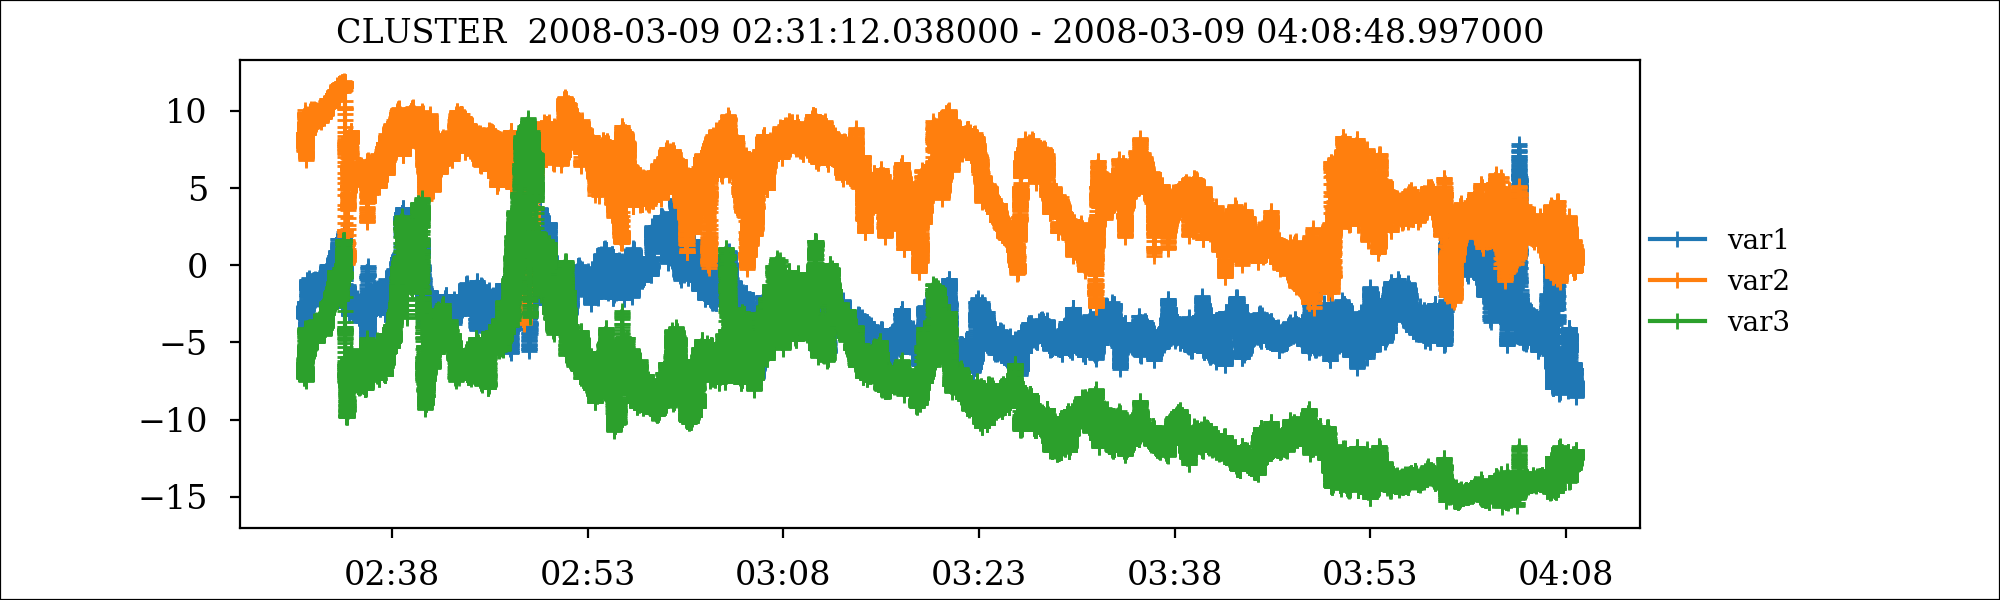

In [3]:
####################################################################################################################
'''DATA PRE-PROCESSING: data-gaps management - interpolate, flagg erroneous data'''
####################################################################################################################

### PRINT ERRONEOUS DATA - JUST PRINTING, NO MANAGEMENT OF DATA GAPS
'''!!!REMOVE '#' AND SET True OR False!!!'''
#print_flags=False

if print_flags:
    AN.PRINT_FLAGS(flag, mag_time, MAG_DATA)

### MASK FLAGGED DATA ###
t_masked, t_maskedsec, MAG_DATA_MASKED = AN.MASK_ERRDATA(flag, TRIMMED_MAG_TIME, TRIMMED_MAG_DATA)

### PLOT MASKED DATA ###
'''!!!REMOVE '#' AND SET True OR False!!!'''
#plot_masked_data=True # choose if you want to plot data

if plot_masked_data:
    mafig=AN.PLOT_DATA(MAG_DATA_MASKED,t_masked,satellite)
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #save_masked_data=True # choose if you want to save data
    if save_masked_data:
        mafig.savefig(default_output_path+satellite+'_'+'MASKED_DATA_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'.png')             

### ADD FLAGS WHERE THERE ARE GAPS IN TIME ###
t_pseudointerp, t_parsed, MAG_DATA_SELFFLAGGED = AN.SELF_FLAGG(data_res, t_maskedsec, MAG_DATA_MASKED)
####################################################################################################################

In [4]:
###################################################################################################################
'''PSD - COMPUTATION, PLOTTING, SAVING'''
###################################################################################################################

###PSD - COMPUTATION###

'''!!!REMOVE '#' AND SET True OR False!!!'''
compute_PSD=False

if compute_PSD:
    ###PSD Globals###
    '''!!!REMOVE '#' and change values as needed!!!'''
    psd_window, segment_magnitude, overlap_percent='hamming',512,0.9
        
    DATA_PSEUDOINT,freq,PSD,figures=AN.PSEUDOINTERP_PSD(data_freq,t_maskedsec,t_pseudointerp,MAG_DATA_MASKED, 
                                                        psd_window, segment_magnitude, overlap_percent) 

    ###PSD - PLOT###
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #plot_PSD=True
    
    if plot_PSD:
        figPSD = plt.figure('figPSD', figsize = (10,7))
        p0=figPSD.add_axes([0.,0.,1.,1.])
        p0.axes.get_xaxis().set_visible(False)
        p0.axes.get_yaxis().set_visible(False)                    
        p = figPSD.add_axes([0.2,0.2,0.7,0.7])
        for i in range(len(PSD.keys())):
                p.loglog(freq,PSD[i], ms=5, c=D.myc[i],label='var'+str(i+1))
                l=p.legend()
        p.set_xlabel('S/C frame frequency [Hz]'+'\n'+str(t_parsed[0])[0:10]+'\n'+str(t_parsed[0])[11:19]+'-'+str(t_parsed[-1])[11:19], **D.lblpr)  
        p.set_ylabel(r'$\mathrm{PSD}$', **D.lblpr)
        p.xaxis.grid(True, **D.mingridprops)
        p.yaxis.grid(True, **D.majgridprops)
        p.xaxis.grid(True, **D.majgridprops)
        #p.yaxis.grid(True, **D.mingridprops)
        plt.show()


    ###PSD - SAVE PLOTS###
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #save_individual_PSD=False
    #save_allinone_PSD=False
    
    if save_individual_PSD:
        for i in range(len(figures)):
            figures[i].savefig(default_output_path+satellite+'_'+'PSD_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'_var'+str(i+1)+'.png')
    if save_allinone_PSD:        
        figPSD.savefig(default_output_path+satellite+'_'+'PSD_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'_allvar.png')    

    ###PSD - SAVE FREQUENCIES AND POWERS IN TXT FILE###   
###################################################################################################################    

max_scale:  15


<IPython.core.display.Javascript object>


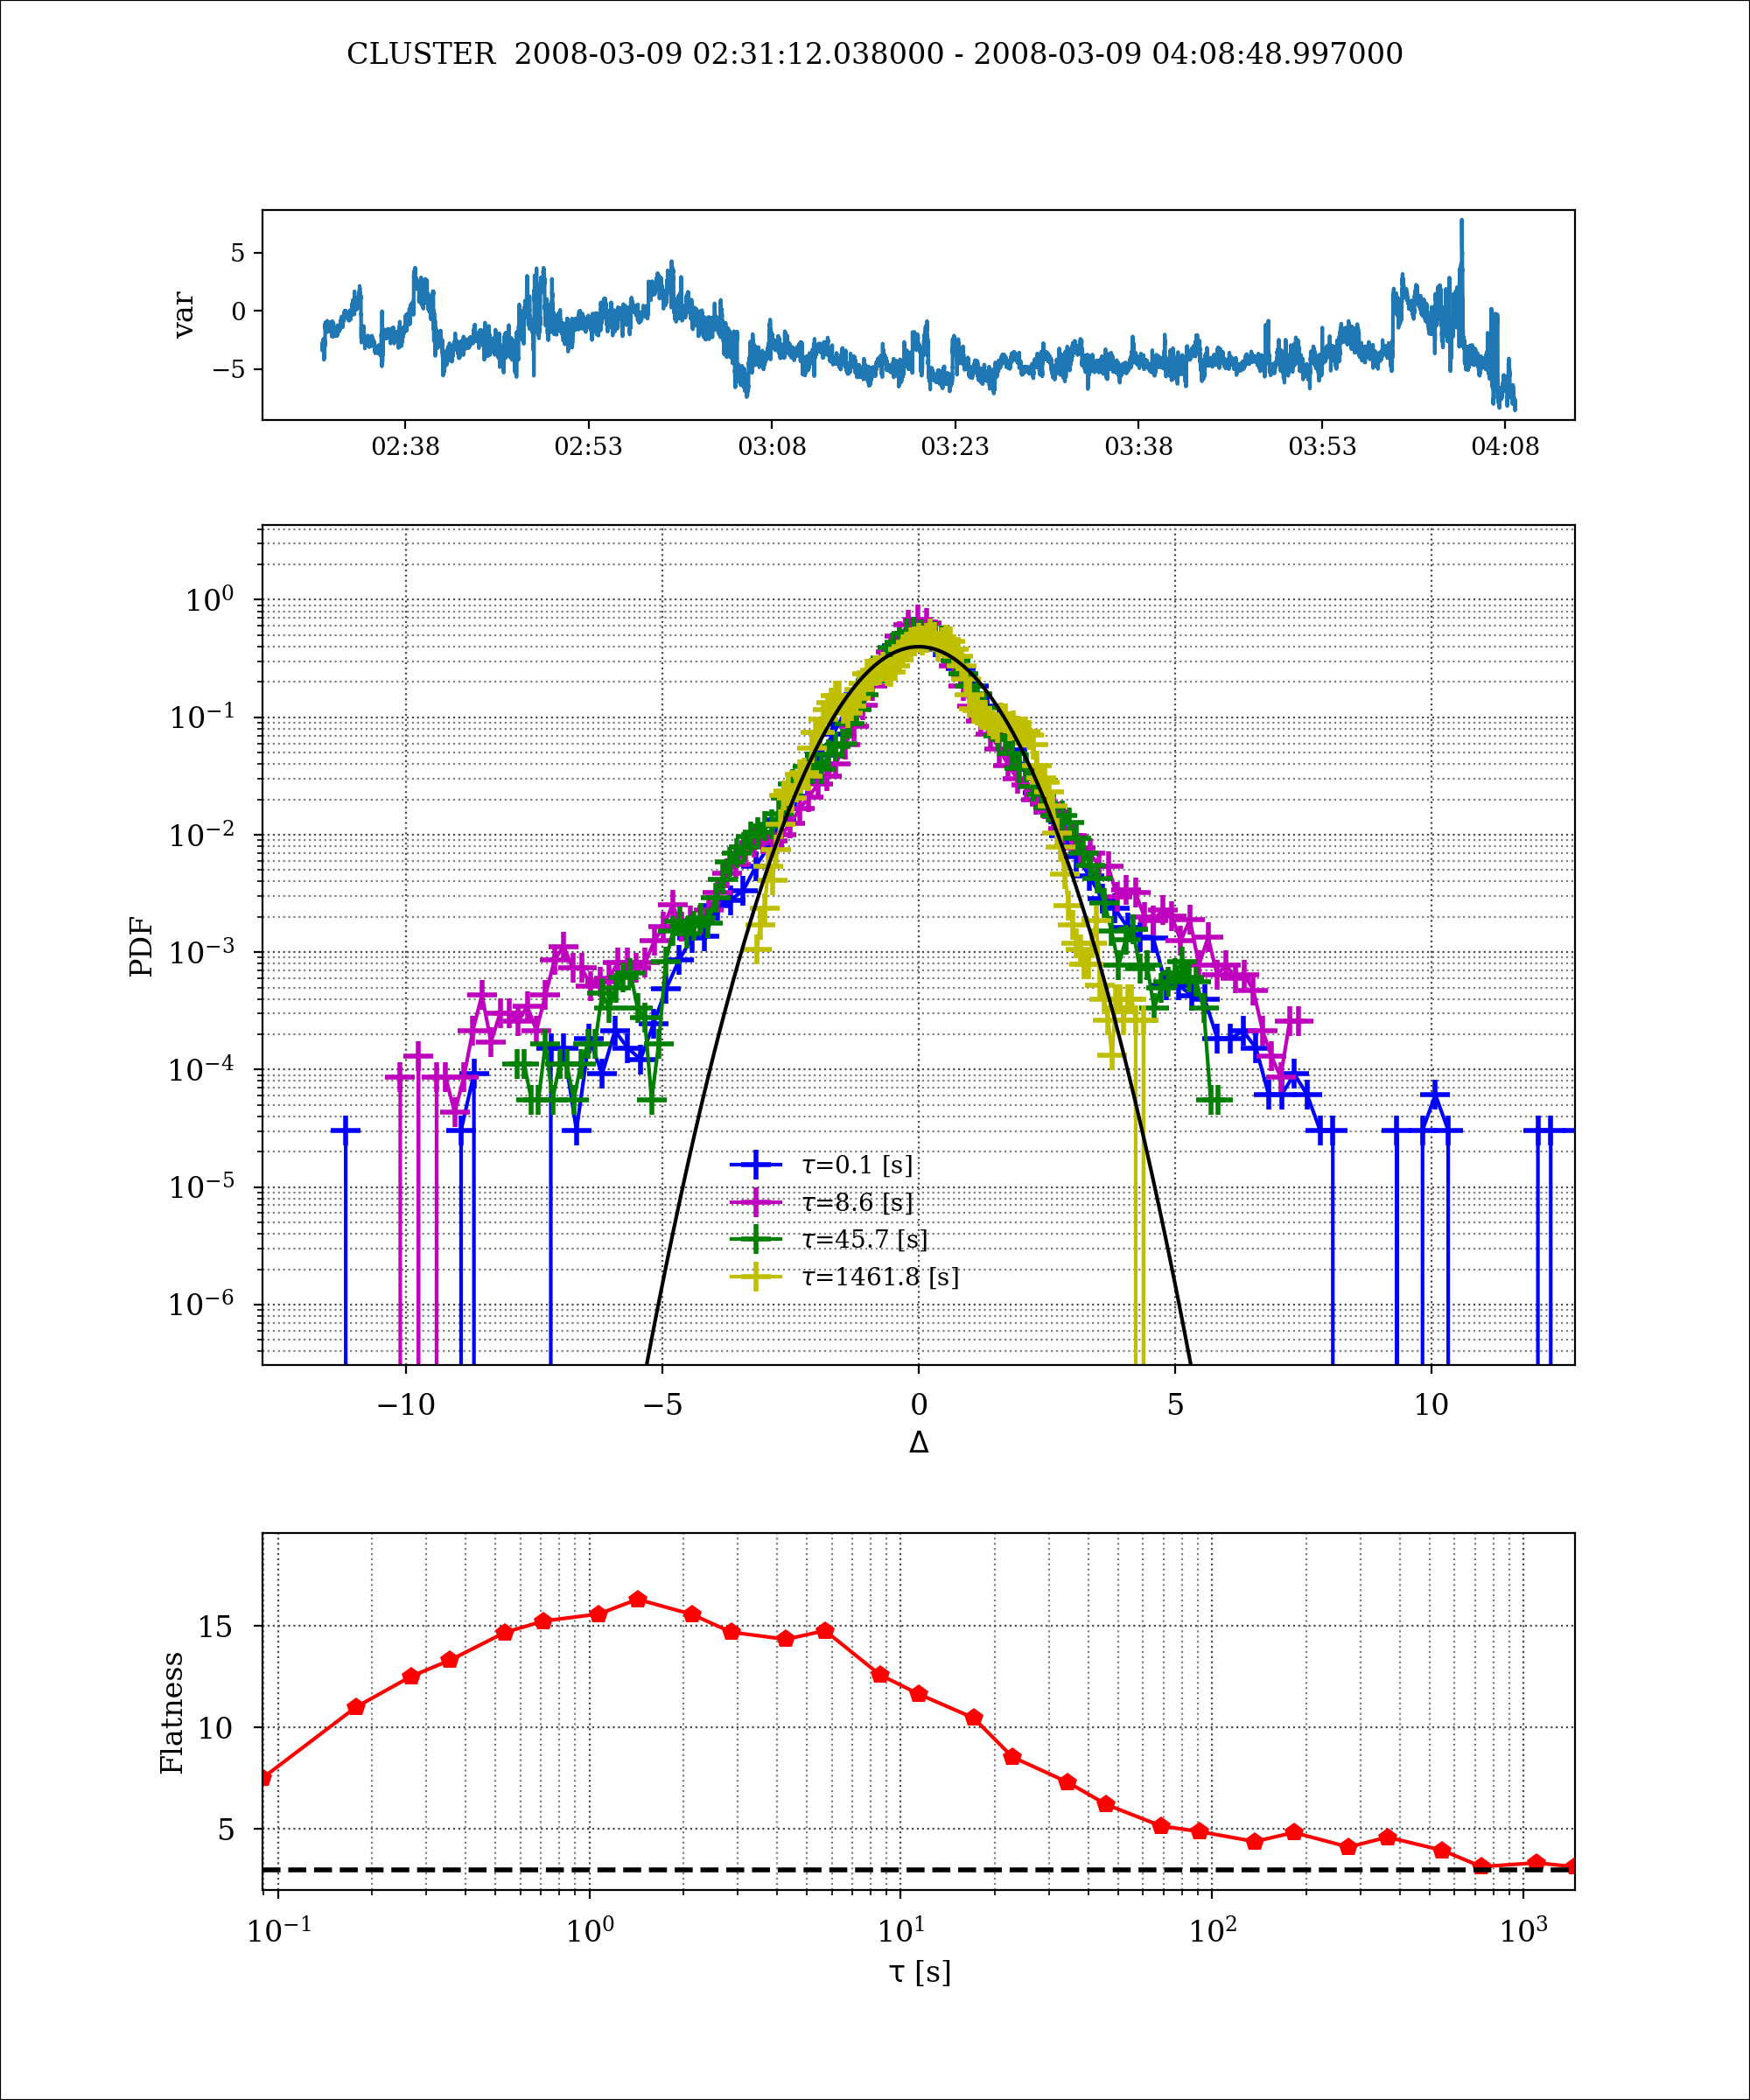

In [5]:
###################################################################################################################
'''PDF - COMPUTATION, PLOTTING, SAVING'''
###################################################################################################################

'''!!!REMOVE '#' AND SET True OR False!!!'''
compute_PDF=True

'''REMOVE '#' AND CHOOSE VARIABLE FOR WHICH PDFs WILL BE COMPUTED!!!'''
#choose_PDF_var=0 ## 0,1,2, etc correspond to data(!) columns

if compute_PDF:
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #draw_PDF=True
    draw_SF=False
    #save_PDF=True # True only of draw_PDF is true
    #save_SF=True # True only of draw_SF is true

    PDF_var=MAG_DATA_MASKED[:,choose_PDF_var]
    max_scale=AN.maxscale(floor(len(PDF_var)/3))
    print('max_scale: ', max_scale)
    scl=AN.Scales(1, max_scale, True)
    
    '''!!!REMOVE '#' AND INPUT RANK LIMITS, LOW AND HIGH!!!'''   
    #rank_low=1
    #rank_high=6
    
    rank=np.arange(rank_low,rank_high,1)
    PDFs,binc,Flatness,SF=AN.PDF(PDF_var,rank,scl,binno,draw_SF)

    if draw_PDF:
        figPDF=AN.DRAW_PDF(PDF_var,t_masked,scl,data_freq,binc,PDFs,Flatness,satellite)   
        if save_PDF:
            figPDF.savefig(default_output_path+satellite+'_'+'PDF_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'.png')
        
    if draw_SF:
        figSF=AN.DRAW_SF(PDF_var,t_masked,scl,data_freq,rank,SF,Flatness,satellite)    
        if save_SF:
            figSF.savefig(default_output_path+satellite+'_'+'SF_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'.png')
        
###################################################################################################################

In [6]:
###############################################################################################################
'''PARTITION FUNCTIONS - COMPUTATION, PLOTTING, SAVING'''
###############################################################################################################
#import math
'''!!!REMOVE '#' AND SET True OR False!!!'''
#compute_PF=True # possible only if compute_PDF is True

'''REMOVE '#' AND CHOOSE VARIABLE FOR WHICH ROMA SPECTRUM WILL BE COMPUTED!!!'''
#choose_PF_var=0 ## 0,1,2, etc correspond to data(!) columns

if compute_PF:
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #draw_PF=True
    #save_PF=True # True only of draw_PF is true
    
    
    PartitionFunctions_var=MAG_DATA_MASKED[:,choose_PF_var]
    max_scale=AN.maxscale(floor(len(PartitionFunctions_var)))    
    scl=AN.Scales(1, max_scale, False)

    '''!!!REMOVE '#' AND INPUT RANK LIMITS, LOW AND HIGH!!!'''   
    #rank_low=-5
    #rank_high=6  
    #rank_discretisation=0.5
    
    rank=np.arange(rank_low,rank_high,1.)
    
    '''!!!REMOVE '#' AND INPUT SCALE RANGE FOR FIT, LOW AND HIGH INDEX OF SCALES!!!'''   
    #scl_low=1 #choose the index of the beginning of the scale interval for fit
    #scl_high=11 #choose the index of the end of the scale interval for fit
    
    scl_ch=scl[scl_low:scl_high]

    PF,tau_q,amp,Dq,alpha,f_alpha,alpha_model,f_alpha_model=AN.PartitionFunctions(PartitionFunctions_var,data_freq,rank,scl,(scl_low,scl_high))
    
    if draw_PF:
        figPF,figPFSpectrum=AN.DRAW_PF(PDF_var,t_masked,scl,scl_ch,data_freq,rank,PF,amp,tau_q,Dq,alpha,f_alpha,alpha_model,f_alpha_model,satellite)   
    if save_PF:
        figPF.savefig(default_output_path+satellite+'_'+'PF_'+str(MAG_TIME[0])[0:19]+'-'+str(MAG_TIME[-1])[10:19]+'.png')
        figPFSpectrum.savefig(default_output_path+satellite+'_'+'PFSpectrum_'+str(MAG_TIME[0])[0:19]+'-'+str(MAG_TIME[-1])[10:19]+'.png')

this is the function which calculates the Range-Limited Structure Functions, SF(tau,q)
this is the function which calculates the Range-Limited Structure Functions, SF(tau,q)
this is the function which calculates the Range-Limited Structure Functions, SF(tau,q)
this is the function which calculates the Range-Limited Structure Functions, SF(tau,q)
this is the function which calculates the Range-Limited Structure Functions, SF(tau,q)


../AnalysisMethods/ANALYSIS.py:959: RuntimeWarning: Mean of empty slice
  SF_scl_q_s=(np.nanmean(np.power(FluctDY1,q)))


this is the function which calculates the Range-Limited Structure Functions, SF(tau,q)
done computing range limited structure functions
solutions sets for each DY [{0.45} {0.9, 0.9500000000000001} {0.9} {0.9, 0.7000000000000001}
 {0.05, 0.30000000000000004, 0.6000000000000001, 0.2, 0.7000000000000001}
 {0.35000000000000003, 0.55, 0.6000000000000001}]
Find the Best ROMA Solution for each DY
ROMASol:  [array([0.45]) array([0.9]) array([0.9]) array([0.7]) array([0.05])
 array([0.6])]
DONE COMPUTING ROMA SOLUTIONS


<IPython.core.display.Javascript object>


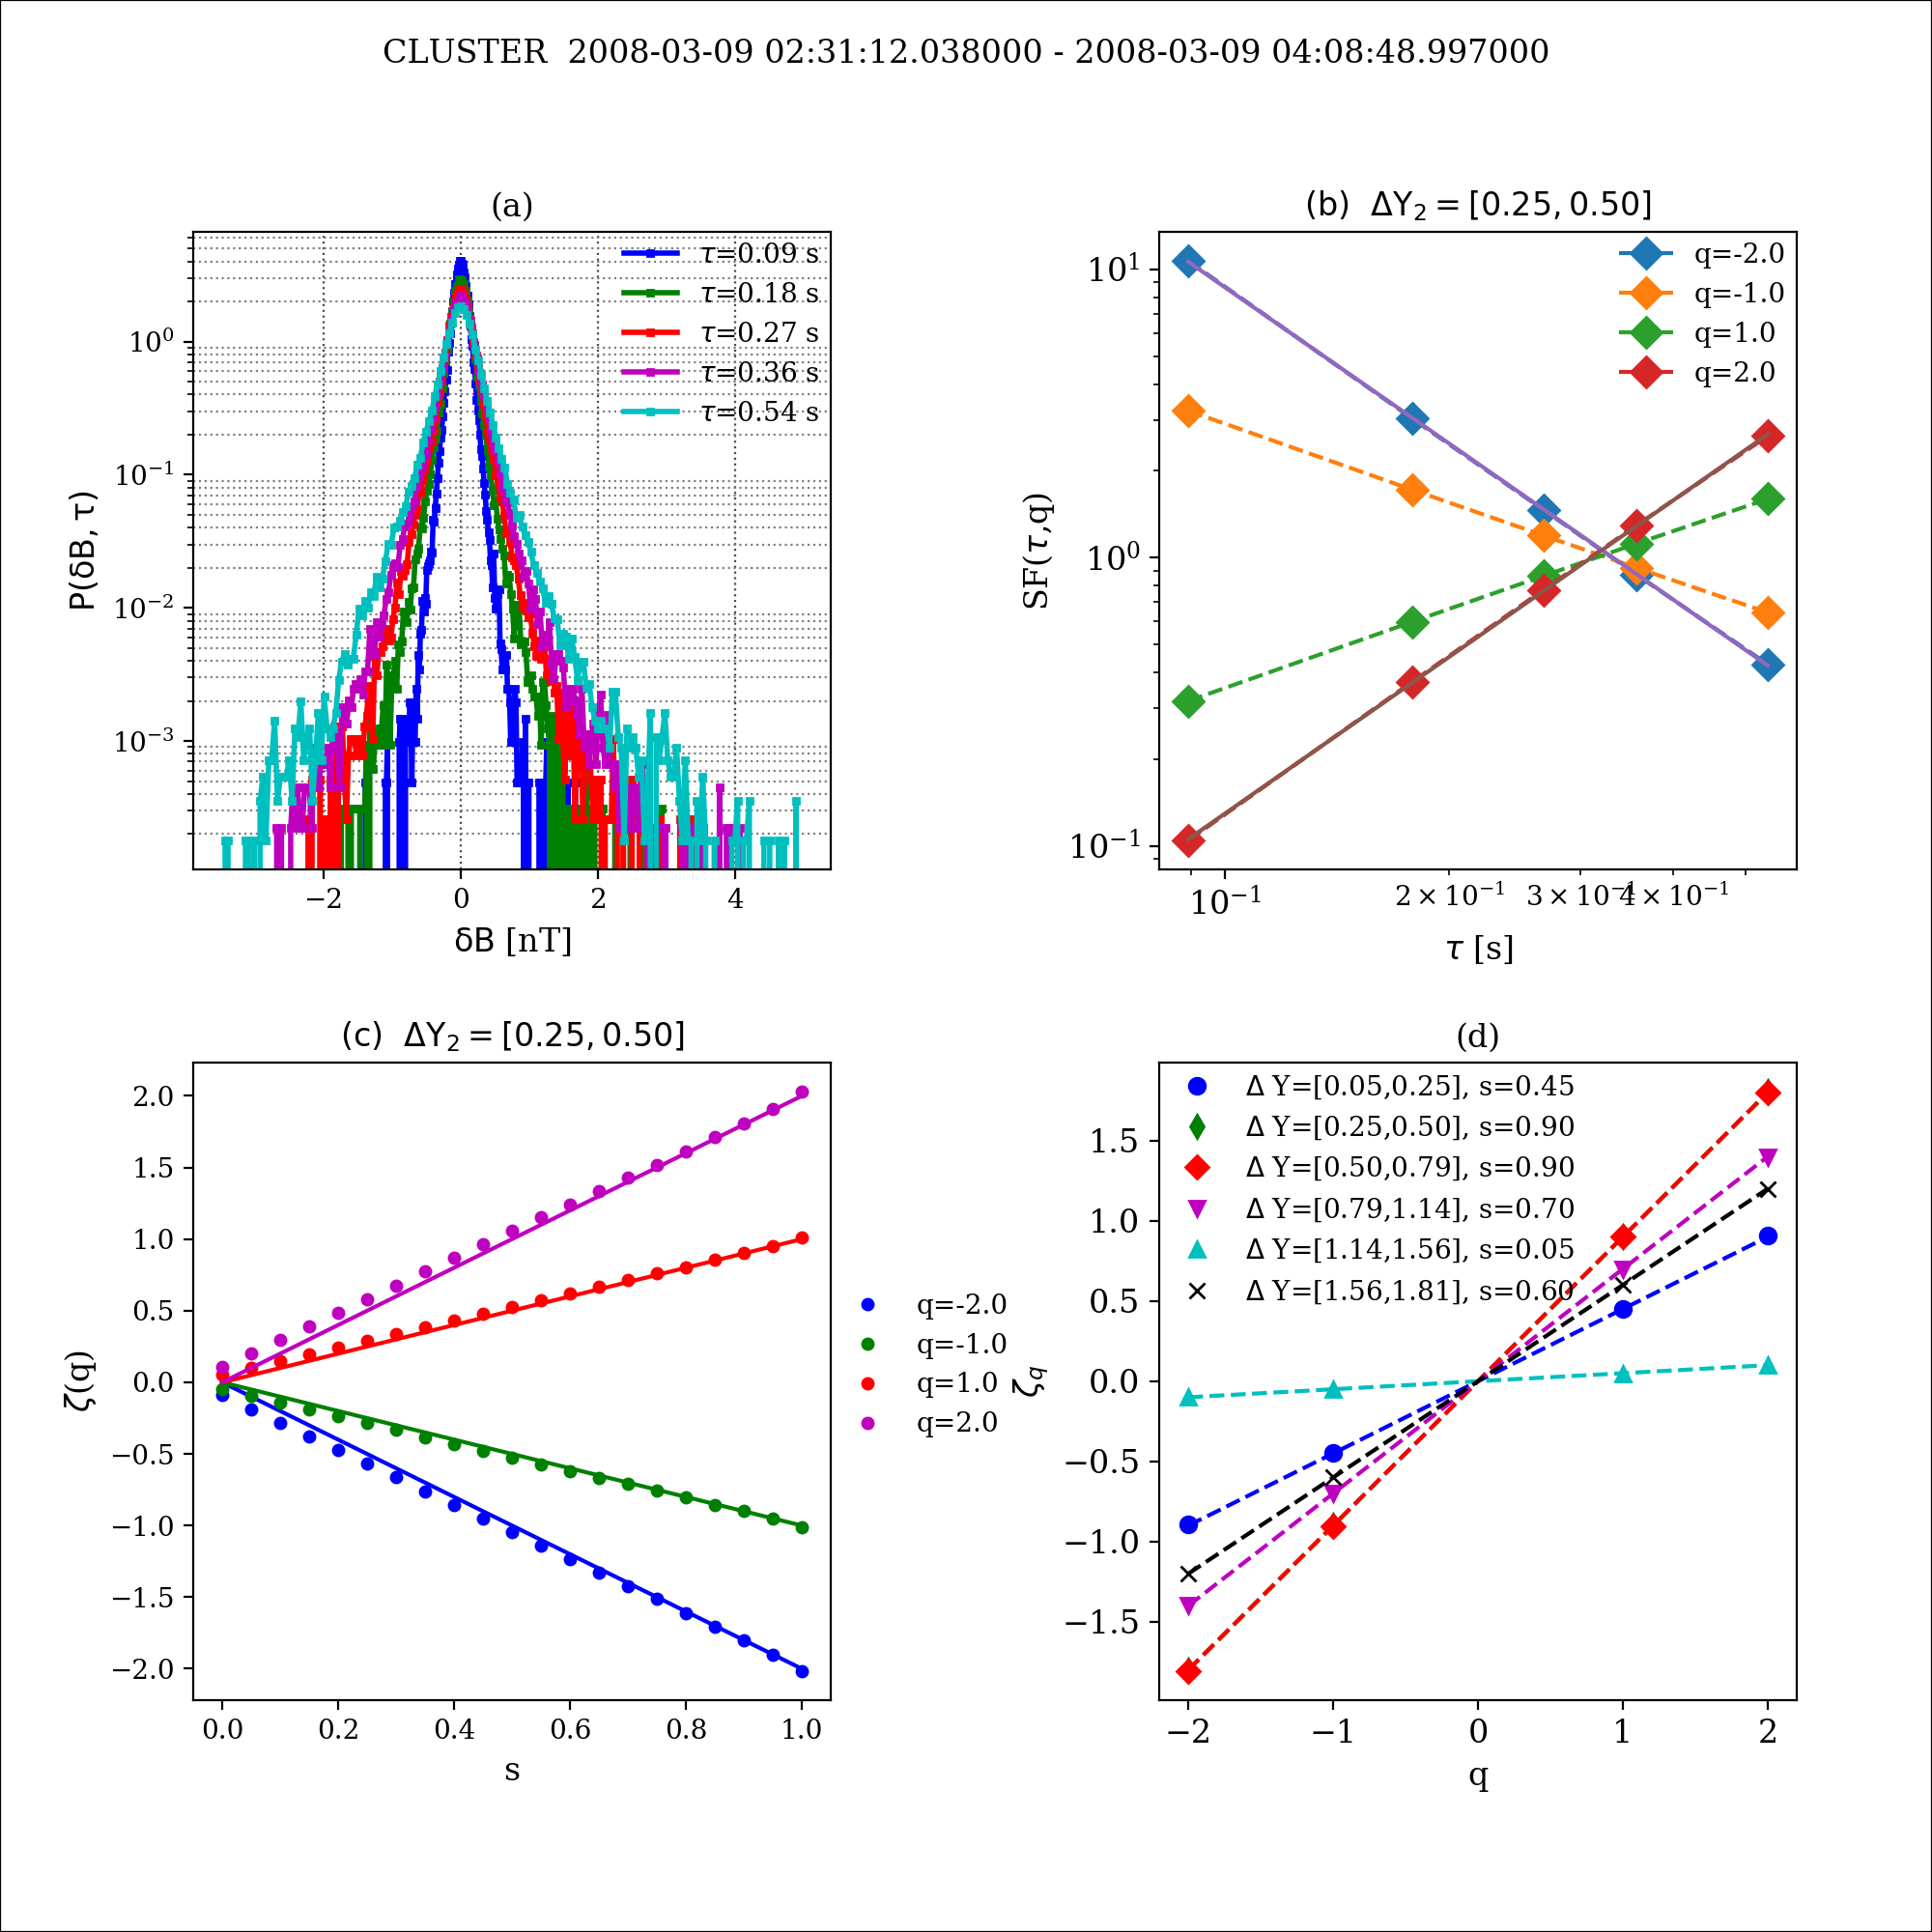

<IPython.core.display.Javascript object>


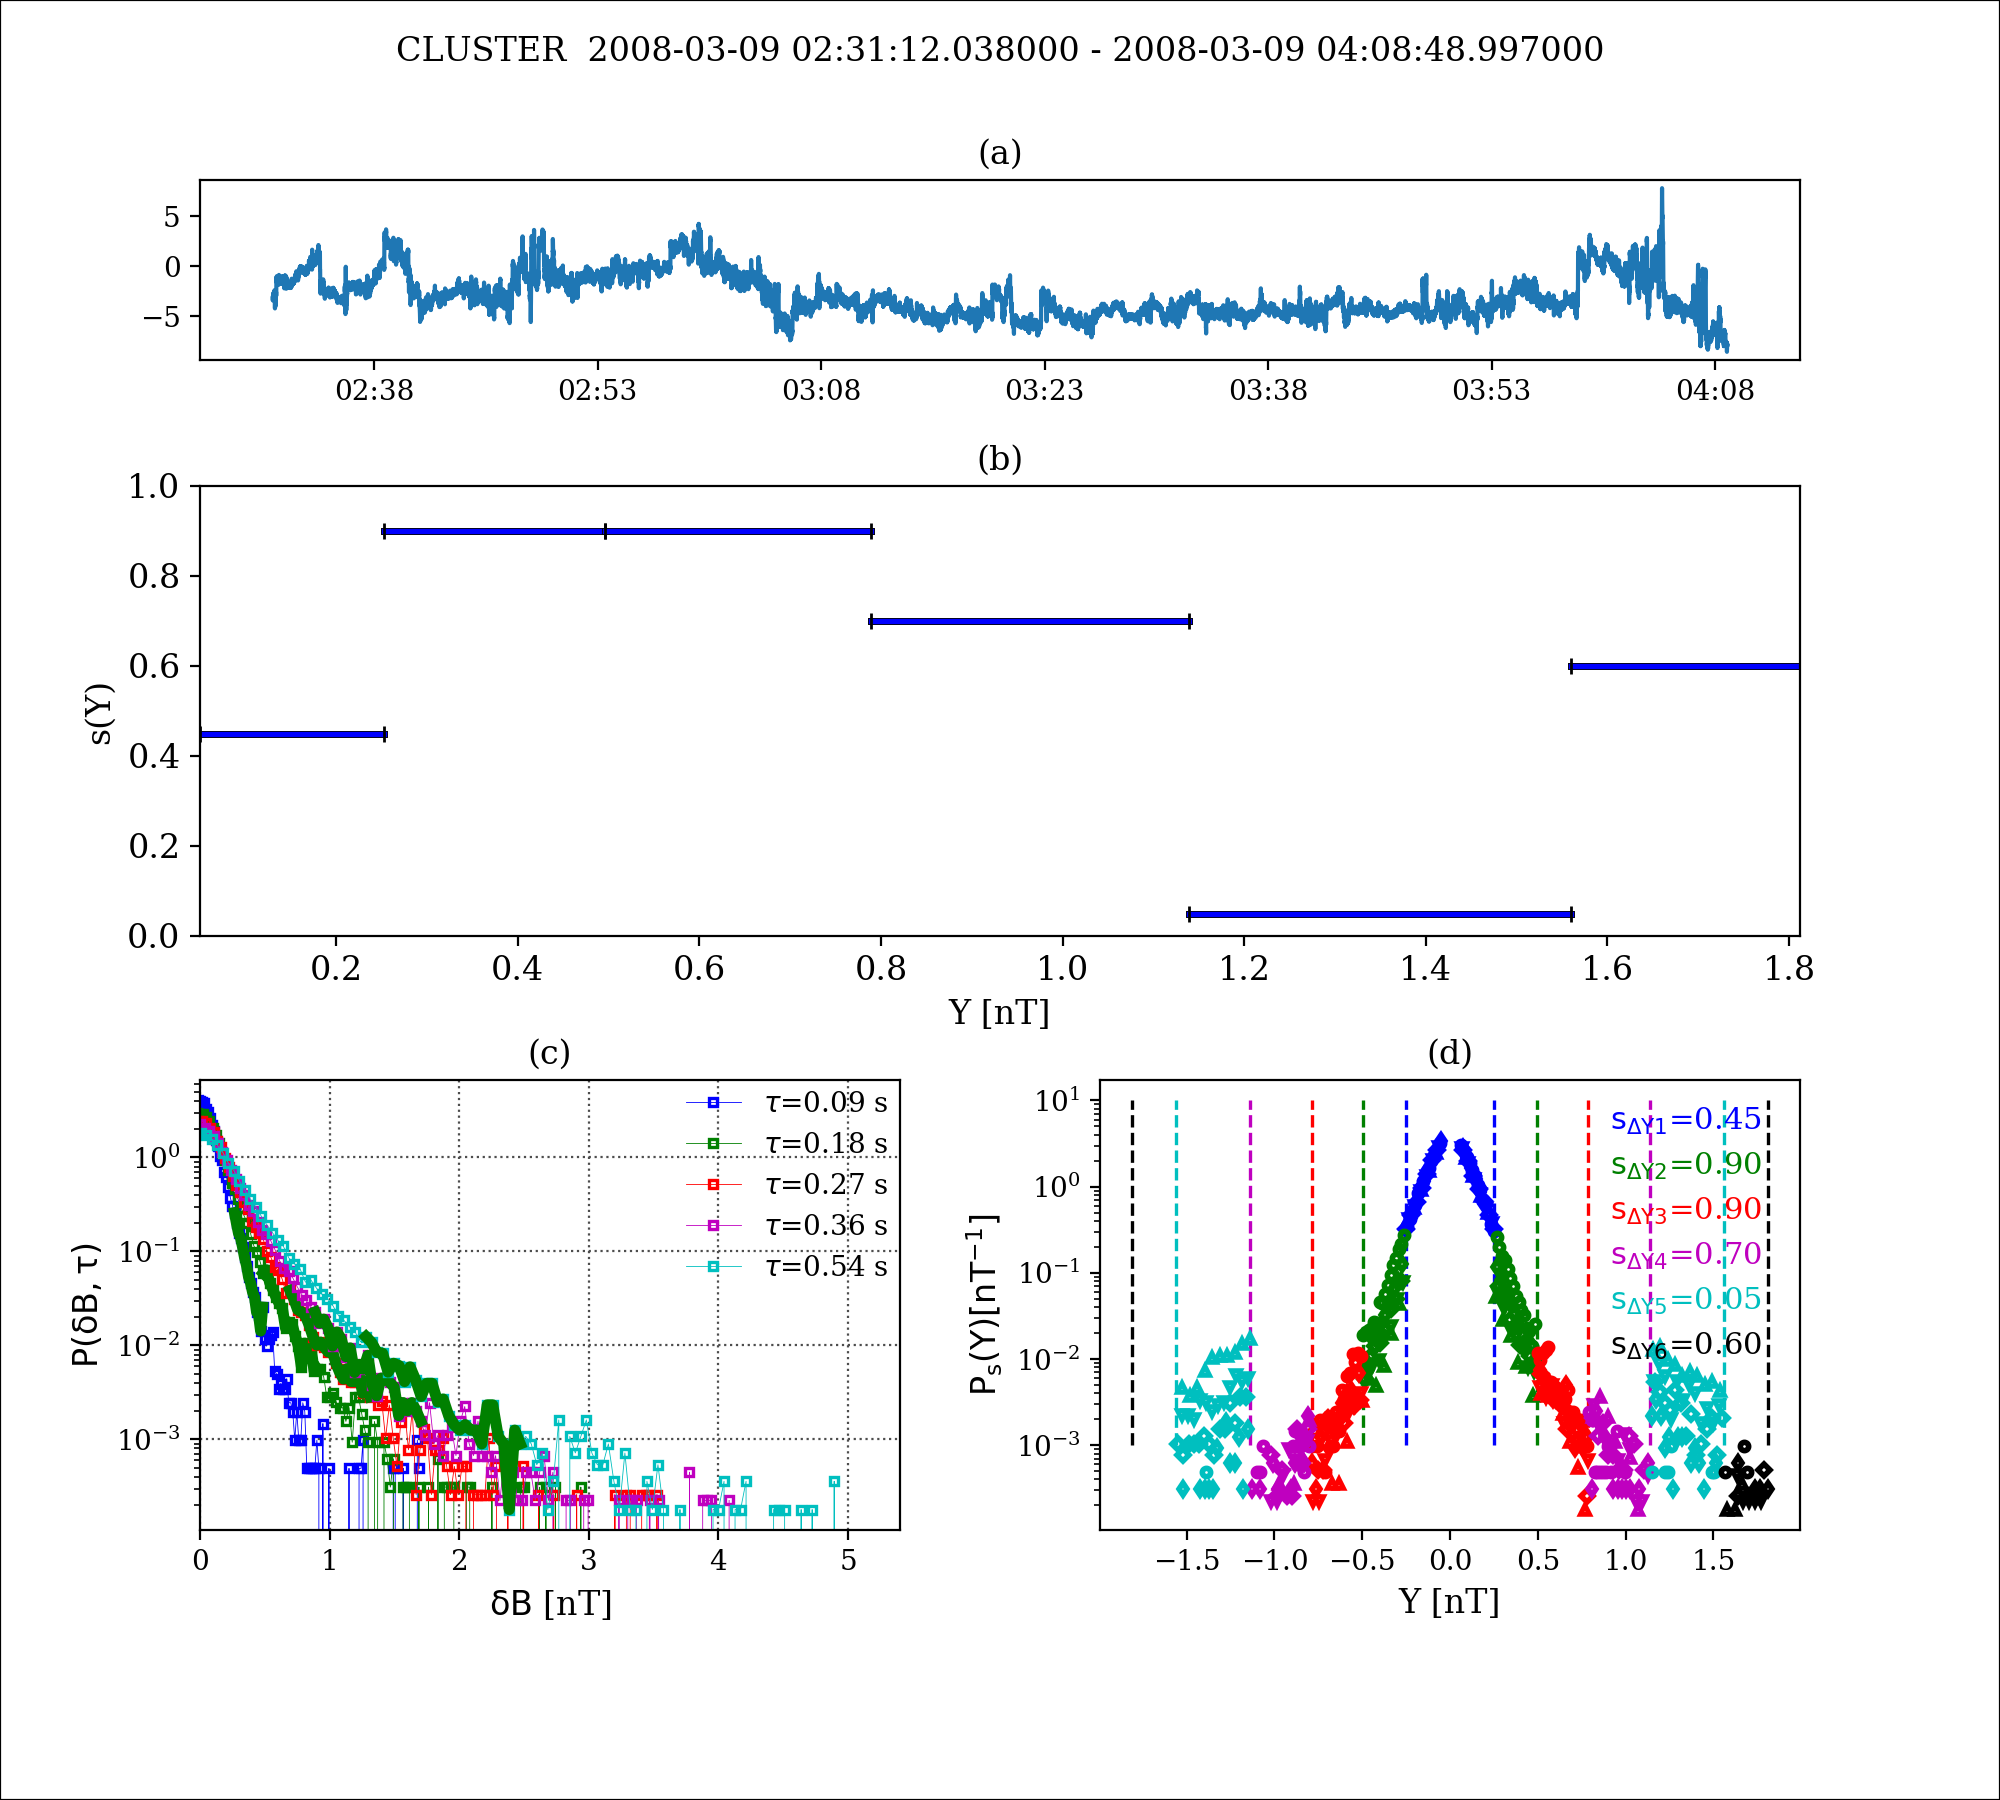

In [7]:
###############################################################################################################
'''ROMA - COMPUTATION, PLOTTING, SAVING'''
###############################################################################################################

'''!!!REMOVE '#' AND SET True OR False!!!'''
compute_ROMA=True # possible only if compute_PDF is True

'''REMOVE '#' AND CHOOSE VARIABLE FOR WHICH ROMA SPECTRUM WILL BE COMPUTED!!!'''
#choose_ROMA_var=0 ## 0,1,2, etc correspond to data(!) columns

if compute_ROMA:
    ROMA_var=MAG_DATA_MASKED[:,choose_ROMA_var]
    max_scale=AN.maxscale(floor(len(ROMA_var)/3))
    scl=AN.Scales(1, max_scale, True)
    
    '''REMOVE '#' AND CHOOSE VARIABLE FOR WHICH ROMA SPECTRUM WILL BE COMPUTED!!!'''
    #scl_roma_low=0
    #scl_roma_high=5
    #scl_roma_step=1

    '''!!!REMOVE '#' AND SET THE LIMITS AND DISCRETISATION FOR ROMA INDICES, s!!!'''        
    #s_roma_low=0.
    #s_roma_high=1.
    #s_roma_step=0.05
    
    '''!!!REMOVE '#' AND SET THE LIMITS AND DISCRETISATION FOR PDF MOMENT ORDERS (RANKS), q!!!'''            
    #q_roma_low=-3
    #q_roma_high=4
    #q_roma_step=1
    
    '''REMOVE '#' AND CHOOSE NUMBER OF BINS FOR PDF COMPUTATION!!!'''
    #ROMA_bins=50
    
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #input_DY=False    
    if input_DY:
        '''!!!IF input_DY IS True, INPUT deltaY BINS OF YOUR CHOICE!!!'''
        deltaYbins=[[0.001,0.3],[0.3,0.6]]

    
    chscl=scl[scl_roma_low:scl_roma_high:scl_roma_step]    
    s_rall=np.arange(s_roma_low,s_roma_high+s_roma_step,s_roma_step)
    q_rall=np.concatenate((np.arange(q_roma_low,0.,q_roma_step),np.arange(1.,q_roma_high,q_roma_step)), axis=0)   
    if input_DY:
        PDF,PDF_bins,Rescaled_PDF,Rescaled_PDF_bins,deltaY,RangeLimited_SF_DY,slopes_allDY,SFslopes_ROMASolutions,ROMASolutions=AN.ROMA(ROMA_var,chscl,ROMA_bins,s_rall,q_rall,deltaYbins)
    elif not input_DY:
        PDF,PDF_bins,Rescaled_PDF,Rescaled_PDF_bins,deltaY,RangeLimited_SF_DY,slopes_allDY,SFslopes_ROMASolutions,ROMASolutions=AN.ROMA(ROMA_var,chscl,ROMA_bins,s_rall,q_rall,None)

    print ('DONE COMPUTING ROMA SOLUTIONS')

    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #draw_ROMA=True
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #save_ROMA=True
    if draw_ROMA:
        '''!!!REMOVE '#' AND CHOOSE FOR WHICH DY BIN PLOTS WILL BE DRAWN AND SAVED, NUMBERING STARTS AT 0!!!'''               
        choose_dy=1

        if draw_ROMA:
            fZETA, fROMA=AN.DRAW_ROMA(ROMA_var,t_masked,PDF,PDF_bins,Rescaled_PDF,Rescaled_PDF_bins,deltaY,RangeLimited_SF_DY,slopes_allDY,SFslopes_ROMASolutions,ROMASolutions,chscl,data_freq,q_rall,s_rall,choose_dy,satellite)   
            if save_ROMA:
                fZETA.savefig(default_output_path+satellite+'_'+'ROMA_ZETA_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'.png')
                fROMA.savefig(default_output_path+satellite+'_'+'ROMA_SPECTRUM_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'.png')


###############################################################################################################

In [8]:
###################################################################################################################
'''MUTUAL INFORMATION - COMPUTATION, PLOTTING, SAVING'''
###################################################################################################################

'''!!!REMOVE '#' AND SET True OR False!!!'''
#compute_MI=True # possible only if compute_PDF is True

'''!!REMOVE '#' and choose variable for which PDFs will be computed'''
#choose_MI_var=0 ## 0,1,2, etc correspond to data(!) columns

'''!!!REMOVE '#' and input the number of bins for joint and marginal probability distributions!!!'''
#MI_bins=10
    
if compute_MI:
    MI_var=MAG_DATA_MASKED[:,choose_MI_var]
    max_scale=AN.maxscale(floor(len(MI_var)/6))
    scl=AN.Scales(1, max_scale, True)
    ScaleFluctuations=AN.EqualLengthFluctuations(MI_var,scl)
    
    MI_tautau=np.empty((len(scl), len(scl)))
    for ifms in range(len(scl)):
        for imi in range(len(scl)):
            MI_tautau[ifms,imi]=AN.MI(ScaleFluctuations[ifms], ScaleFluctuations[imi], MI_bins)    

    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #compute_Baseline=True
    
    if compute_Baseline:
        print ('RANDOMIZING THE DATA AND COMPUTING MI BASELINE - IT MAY TAKE SOME TIME')
        '''!!!REMOVE '#' choose the number of scambles to estimate MI baseline!!!'''
        #number_of_scrambles=2
        
        mMI, sMI = AN.MI_Baseline(ScaleFluctuations, scl, scl, MI_bins, number_of_scrambles)
        Baseline=np.empty((len(scl)), dtype=list)
        for iscr in range(len(scl)):
            Baseline[iscr]=list(np.divide(np.subtract(MI_tautau[iscr],mMI[iscr]),sMI[iscr])) ##(MI-meanMI)/sigma_MI
        print ('DONE COMPUTING THE MI BASELINE')
        
    '''!!!REMOVE '#' AND SET True OR False!!!'''
    #draw_MI=True
    #save_MI=True
    
    if draw_MI:
        if compute_Baseline:
            figMI=AN.DRAW_MI(MI_tautau,Baseline,scl,data_res,compute_Baseline,t_masked,satellite)
        else:
            figMI=AN.DRAW_MI(MI_tautau,None,scl,data_res,compute_Baseline,t_masked,satellite)            
    if save_MI:
        if compute_Baseline:        
            figMI.savefig(default_output_path+satellite+'_'+'MI_Baseline_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'.png')
        else:
            figMI.savefig(default_output_path+satellite+'_'+'MI_'+str(t_masked[0])[0:10]+'_'+str(t_masked[0])[11:13]+str(t_masked[0])[14:16]+str(t_masked[0])[17:19]+'-'+str(t_masked[-1])[11:13]+str(t_masked[-1])[14:16]+str(t_masked[-1])[17:19]+'.png')            